In [2]:
from commonroad.common.file_reader import CommonRoadFileReader
from python_scripts.simulation import step_simulation
from python_scripts.visualizer import Visualizer
from python_scripts.utilities import load_results, merge_config, save_results
import yaml
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import matplotlib.gridspec as gridspec


def plot_result_scenario(time_step, ego_vehicle, scenarios, sensor_views):
    plt.cla()
    Visualizer().plot(scenario=scenarios[time_step],
                  sensor_view=sensor_views[time_step],
                  ego_vehicle=scenarios[time_step].obstacle_by_id(ego_vehicle.obstacle_id),
                  time_begin=time_step)
    plt.axis('scaled')
    plt.xlim(70,250)
    plt.ylim(-5, 7)


In [3]:
scenario_path = "scenarios/ZAM_trafficjam-1_1_T-1"
results_folder = "results/"
plot_figures_at_timesteps = [0,5,18,30]

#======================================================#
with open("scenarios/highd_config.yaml") as file:
    global_config = yaml.load(file, Loader=yaml.FullLoader)
with open(scenario_path + ".yaml") as file:
    scenario_config = yaml.load(file, Loader=yaml.FullLoader)
config = merge_config(global_config, scenario_config)

scenario1, _ = CommonRoadFileReader(scenario_path + ".xml").open()
scenario2, _ = CommonRoadFileReader(scenario_path + ".xml").open()

config['occlusion_params']['ideal_tracking_enabled'] = True
config['occlusion_params']['velocity_tracking_enabled'] = True
untracked_results = step_simulation(scenario1, config, occlusion_aware=False)

config['occlusion_params']['ideal_tracking_enabled'] = False
config['occlusion_params']['velocity_tracking_enabled'] = False
tracked_results = step_simulation(scenario2, config)


/home/jvarvn/.local/lib/python3.8/site-packages/shapely/predicates.py:853: RuntimeWarning: invalid value encountered in overlaps
  return lib.overlaps(a, b, **kwargs)
/home/jvarvn/.local/lib/python3.8/site-packages/shapely/predicates.py:853: RuntimeWarning: invalid value encountered in overlaps
  return lib.overlaps(a, b, **kwargs)
/home/jvarvn/.local/lib/python3.8/site-packages/shapely/predicates.py:853: RuntimeWarning: invalid value encountered in overlaps
  return lib.overlaps(a, b, **kwargs)
/home/jvarvn/.local/lib/python3.8/site-packages/shapely/predicates.py:853: RuntimeWarning: invalid value encountered in overlaps
  return lib.overlaps(a, b, **kwargs)
/home/jvarvn/.local/lib/python3.8/site-packages/shapely/predicates.py:853: RuntimeWarning: invalid value encountered in overlaps
  return lib.overlaps(a, b, **kwargs)
/home/jvarvn/.local/lib/python3.8/site-packages/shapely/predicates.py:853: RuntimeWarning: invalid value encountered in overlaps
  return lib.overlaps(a, b, **kwargs

Text(0.5, 1.0, 'Velocity profiles for the different methods of occlusion tracking')

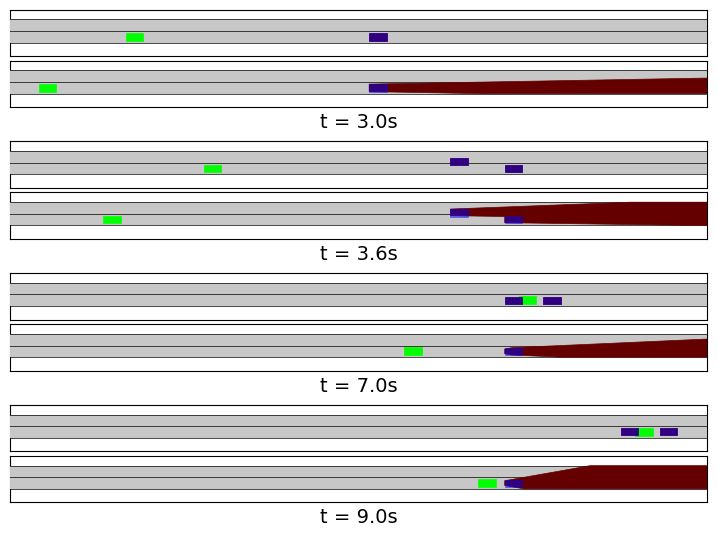

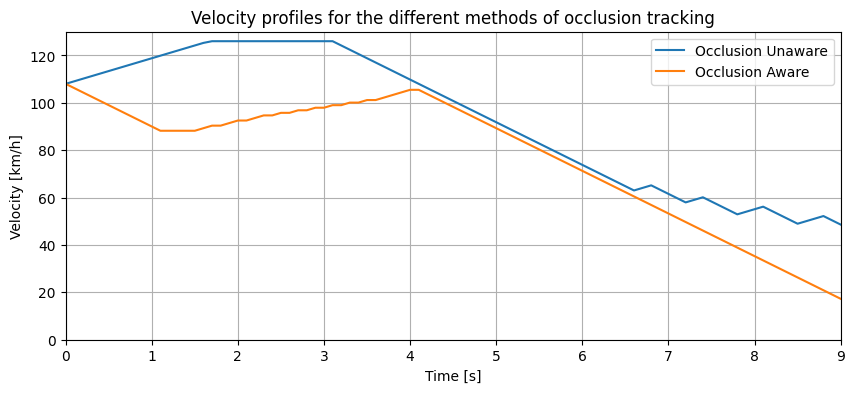

In [5]:


plot_figures_at_timesteps = [30,36,70, 90]


plt.subplots_adjust(hspace=0.35)
outer = gridspec.GridSpec(len(plot_figures_at_timesteps), 1) 

for i, t in enumerate(plot_figures_at_timesteps):
    gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[i], hspace = 0.1)

    ax = plt.subplot(gs[0])
    plot_result_scenario(t, untracked_results[0], untracked_results[1], untracked_results[2])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(gs[1])
    plot_result_scenario(t, tracked_results[0], tracked_results[1], tracked_results[2])
    ax.set_xticks([])
    ax.get_yaxis().set_visible(False)

    ax.set_xlabel("".join(["t = ", str(t*0.1), "s"]), fontsize=14)
plt.gcf().set_size_inches(12, len(plot_figures_at_timesteps)*1.6)


ego_tracked = tracked_results[0]
ego_untracked = untracked_results[0]

plt.figure(figsize=(10, 4))
labels = ['Occlusion Unaware','Occlusion Aware']
for idx, vehicle in enumerate([ego_untracked, ego_tracked]):
    velocities = [round(vehicle.initial_state.velocity*3.6, 2)]
    time = [round(vehicle.initial_state.time_step/10, 2)]
    for state in vehicle.prediction.trajectory.state_list:
        velocities.append(round(state.velocity*3.6, 2))
        time.append(round(state.time_step/10, 2))
    plt.plot(time, velocities, label=labels[idx])
plt.xlabel('Time [s]')
plt.ylabel('Velocity [km/h]')
plt.legend()
plt.grid()
plt.ylim(0, 130)
plt.xlim(0,9)
plt.title("Velocity profiles for the different methods of occlusion tracking")